# PHYS 310 HW 3 Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Calculus Approach 
H & H : Table 4.2

$$Z(A,B) = k \frac{A^n}{B^m}$$

We will find the partial derivatives due to the two vairables, and combine in quadrature.

**For A:** 
$$\alpha_{Z,A} = \alpha_A \frac{\partial Z}{\partial A}$$
$$\frac{\partial Z}{\partial A} = nk\frac{A^{n-1}}{B^m}$$
$$\alpha_{Z,A} = \alpha_Ank\frac{A^{n-1}}{B^m}$$
**For B:**
$$\alpha_{Z,B} = \alpha_B \frac{\partial Z}{\partial B}$$
$$\frac{\partial Z}{\partial B} = -mkA^{n}B^{-m-1}$$
$$\alpha_{Z,B} = -\alpha_B mk\frac{A^{n}}{B^{m+1}}$$
**Combine** (squaring the negative number doesn't matter, and we can take out the equation Z)
$$\alpha_z = \sqrt{\left(\alpha_Ank\frac{A^{n-1}}{B^m}\right)^2 + \left(-\alpha_B mk\frac{A^{n}}{B^{m+1}}\right)^2} $$
$$\alpha_z= k\frac{A^{n}}{B^m}\sqrt{\left(\alpha_An\frac{1}{A}\right)^2 + \left(\alpha_B m\frac{1}{B}\right)^2}$$
$$\frac{\alpha_z}{Z} = \sqrt{\left(n\frac{\alpha_A}{A}\right)^2 + \left(m\frac{\alpha_B}{B}\right)^2}$$

# Functional Approach to Pendulum
When does it matter if we use the functional approach with $T +\Delta T$ or $T- \Delta T$?

In [2]:
def g(L,T):
    return 4*np.pi**2 *L/T**2

L = 0.96
T = 1.970
DeltaT = 0.004

print('The best value of g:',g(L,T))
print('Δg(L,T+ΔT):',g(L,T+DeltaT) - g(L,T))
print('Δg(L,T-ΔT):',g(L,T-DeltaT) - g(L,T))



The best value of g: 9.765590687774262
Δg(L,T+ΔT): -0.03953676381878424
Δg(L,T-ΔT): 0.03977833230749894


It doesn't matter to one significant digit.

In [3]:
DeltaT2 = 0.15

print('Δg(L,T+ΔT):',g(L,T+DeltaT2) - g(L,T))
print('Δg(L,T-ΔT):',g(L,T-DeltaT2) - g(L,T))


Δg(L,T+ΔT): -1.3330344177085962
Δg(L,T-ΔT): 1.6760470673830667


If the uncertainty is much bigger, then the first significant digit would be different in each case.

We can be a little more quantitative about this by considering higher order terms in our 
Taylor series expansions of $g(L,T)$:

\begin{eqnarray*}
g(L,T+\Delta T) &\simeq& g(L,T) + \frac{\partial g}{\partial T} \, \Delta T
                   + \frac{1}{2}\frac{\partial^2 g}{\partial T^2} \Delta T^2\\
g(L,T-\Delta T) &\simeq& g(L,T) - \frac{\partial g}{\partial T}\, \Delta T 
                   + \frac{1}{2}\frac{\partial^2 g}{\partial T^2}\, \Delta T^2.
\end{eqnarray*}
These expressions will have the same magnitude when the terms quadratic in $\Delta T$ 
are small compared to the linear terms, i.e.,

$$ 
\frac{1}{2}\frac{\partial^2 g}{\partial T^2} \Delta T^2  
                    \ll \frac{\partial g}{\partial T} \, \Delta T.   
$$

Rearranging this gives the condition on $\Delta T$:

$$
\Delta T \ll 2\frac{\frac{\partial g}{\partial T}}{\frac{\partial^2 g}{\partial T^2}}
$$

In this problem we have 

$$ 
\frac{\partial g}{\partial T} = -\frac{8\pi^2 L}{T^3}\quad\mbox{and}{\quad}
         \frac{\partial^2 g}{\partial T^2} = \frac{24\pi^2L}{T^4}
$$

so our condition on the size of $\Delta T$ becomes

$$  
\Delta T \ll \frac{2}{3}T. 
$$

This means that in this problem the two uncertainties will be the same when $\Delta T\ll \frac{2}{3}T$, 
or when $\Delta T$ is, say, less than a tenth of $\frac{2}{3}T \sim 0.13$. Guesses around 0.1 are close.

## Functional Approach to van der Waals
H & H : Example 4.2.2

In [4]:
def P(Vm,T):
    '''Returns pressure a function of measured volume and temperature'''
    return R*T/(Vm - b) - a/Vm**2

In [5]:
R = 8.3145
Tbest = 298.0
alpha_T = 0.2
Vmbest = 2.000e-4
alpha_V = 0.003e-4
a = 1.408e-1
b = 3.913e-5

In [6]:
Pbest = P(Vmbest,Tbest)

#we can turn all the uncertainties due to each parameter into a vector u
u = np.zeros(2)
u[0] = P(Vmbest + alpha_V, Tbest)
u[1] = P(Vmbest, Tbest + alpha_T)
u = u - Pbest
print('P [MPa]:', Pbest/1e6,'/n')
print('uncertainties in P due to uncertainties in V and T:',u/1e6,'\n')
print('fractional uncertainties in P due to uncertainties in V and T:',u/Pbest,'\n')
unc = np.sqrt(np.sum(u**2))
print('total uncertainty [MPa]:', unc/1.e6)

P [MPa]: 11.882007832411261 /n
uncertainties in P due to uncertainties in V and T: [-0.01813283  0.01033692] 

fractional uncertainties in P due to uncertainties in V and T: [-0.00152607  0.00086996] 

total uncertainty [MPa]: 0.020872267575327286


Thus:   
$\alpha_P^T \sim  0.010$ MPa,  
$\alpha_P^V \sim  0.018$ MPa,  
$P(\overline V_{in}, \overline T) \pm \alpha_P = 11.88 \pm 0.02$ MPa  
**As expected!**

## Calculus Approximation to van der Waals

$$
P(V_m,T) = \frac{RT}{V_m-b} - \frac{a}{V_m^2}
$$

$$
\alpha_P = \sqrt{\left(\alpha_P^T\right)^2+\left(\alpha_P^V\right)^2}
$$

$$
\alpha_P^T = \left(\frac{\partial P}{\partial T}\right)\alpha_T = \frac{R}{V_m-b}\alpha_T
$$

$$
\alpha_P^V = \left(\frac{\partial P}{\partial V}\right)\alpha_V 
= \left[RT\left(\frac{-1}{(V_m-b)^2}\right) - \frac{a(-2)}{V_m^3}\right]\alpha_V 
= \left[\frac{-RT}{(V_m-b)^2} + \frac{2a}{V_m^3}\right]\alpha_V
$$

$$\alpha_P = \sqrt{\left(\frac{R}{V_m-b}\alpha_T\right)^2 + \left(\left[\frac{-RT}{(V_m-b)^2} + \frac{2a}{V_m^3}\right]\alpha_V\right)^2}$$

In [7]:
# Using the information stored above 
print('P [MPa]:', P(Vmbest,Tbest)/1e6,'/n')
alphaPV = (-R*Tbest/((Vmbest - b)**2) + 2*a/Vmbest**3)*alpha_V
alphaPT = (R/(Vmbest - b))*alpha_T

print('uncertainties in P due to uncertainties in V and T:',alphaPV/1e6,alphaPT/1e6,'\n')
unc = np.sqrt(alphaPV**2+alphaPT**2)
print('total uncertainty [MPa]:', unc/1.e6)

P [MPa]: 11.882007832411261 /n
uncertainties in P due to uncertainties in V and T: -0.018162585626427412 0.010336918008329707 

total uncertainty [MPa]: 0.020898119306488768


Thus:   
$\alpha_P^T \sim  0.010$ MPa,  
$\alpha_P^V \sim  0.018$ MPa,  
$P(\overline V_{in}, \overline T) \pm \alpha_P = 11.88 \pm 0.02$ MPa  
**As expected!**

## Monte Carlo Simulation of van der Waals

In [8]:
numExp = 1000     # Number of Monte Carlo "experiments"
Tvalues = stats.norm.rvs(Tbest, alpha_T, size=numExp)
Vvalues = stats.norm.rvs(Vmbest, alpha_V, size=numExp)
simData = P(Vvalues,Tvalues) # simulate a bunch of pressures
Pbest = np.mean(simData)
alphaP = np.std(simData, ddof = 1)
Pbest/1e6, alphaP/1e6

(np.float64(11.881505136113706), np.float64(0.020050128301167494))

Thus:   
$P(\overline V_{in}, \overline T) \pm \alpha_P = 11.88 \pm 0.02$ MPa  
**As expected!**  
**Note:** We don't get information about how much $T$ and $V_{in}$ affect the pressure individually.

## H & H : 4.8  

The volume flow rate is given by 

$$
\frac{dV}{dt} = \frac{\pi\rho ghr^4}{8\eta L},
$$ 

First, we need to rewrite this relation in terms that will enable us to calculate the viscosity $\eta$ from the
length $L$, the radius $r$ and the slope of a plot of flow rate $F = dV/dt$ versus $h$. Let’s call that 
slope $m$ to simplify the notation.

The slope of the flow rate vs. $h$ graph $dV/dt = m h$ is

$$
m = \frac{\pi\rho gr^4}{8\eta L},
$$

and solving for the viscosity gives

$$
\eta = \frac{\pi\rho gr^4}{8ml}.
$$

Since we know the fractional uncertainties and the equation, we are using the calculus approximation. The uncertainty in the viscosity is therefore given by

\begin{eqnarray*}
\alpha_\eta^2 &=& \left(\frac{\partial \eta}{\partial m}\right)^2\alpha_m^2 
        + \left(\frac{\partial \eta}{\partial L}\right)^2\alpha_L^2 
        + \left(\frac{\partial \eta}{\partial r}\right)^2\alpha_r^2 \\
            &=& \left(\frac{-\eta}{m}\right)^2\alpha_m^2 + \left(\frac{-\eta}{L}\right)^2\alpha_L^2 
              + \left(\frac{4\eta}{r}\right)^2\alpha_r^2,
\end{eqnarray*}

and the fractional uncertainty is given by

$$
\left(\frac{\alpha_\eta}{\eta}\right)^2 
            = \left(\frac{\alpha_m}{m}\right)^2 + \left(\frac{\alpha_L}{L}\right)^2 
            + \left(4\frac{\alpha_r}{r}\right)^2
$$

In [9]:
Frac_alpha_m = 0.07   # Fractional uncertainty in slope 
Frac_alpha_L = 0.005  # Fractional uncertainy in L
Frac_alpha_r = 0.08   # Fractional uncertainty in r
Frac_alpha_eta  = np.sqrt(Frac_alpha_m**2+Frac_alpha_L**2+(4*Frac_alpha_r)**2)
print(Frac_alpha_eta)

0.32760494501762333


So, the fractional precision to which the viscosity is known is 33%. Note that this is dominated by the
error in the radius measurement. If the fractional error were zero for both the slope and the length L measurement, we’d get a fractional uncertainty of 32% with the radius measurement alone because of
the factor of 4 that comes in from the fact that we take the 4th power of $r$ in the relation.

So, clearly if we want to improve the measurement, the radius of the tube (iii) is the thing that we need to
work on -- that dominates the error.

## H & H : 4.10

To combine the students' data best, we need a weighted mean.
$$w_i = \frac{1}{\alpha_i^2}$$
$$\overline x = \frac{\sum_i w_i x_i}{\sum_i x_i^2 }$$
$$\frac{1}{\alpha_x^2} = \sum_i w_i$$

In [10]:
speeds = np.array([3.03, 2.99, 2.99, 3.00, 3.05, 2.97])
uncertainties = np.array([0.04, 0.03, 0.02, 0.05, 0.04, 0.02])
weights = 1/uncertainties**2
weightedAvg = np.dot(speeds,weights)/np.sum(weights)

alpha_speeds = np.sqrt(1/np.sum(weights))
print(weightedAvg, alpha_speeds)


2.9921259842519685 0.011351102608219766


An average of $(2.99 \pm 0.01) \times 10^8$ m/s is pretty good. Adding $(3.0 \pm 0.3)$ is not going to be doing much because the large uncertainty causes it to be weighted lower, and it's close to the average. $(4.01 \pm 0.01)$ is going to affect it more because the claimed small uncertainty will cause it to be weighted more, and it's very far from the current average.

In [11]:
speeds = np.array([3.03, 2.99, 2.99, 3.00, 3.05, 2.97, 3.0])
uncertainties = np.array([0.04, 0.03, 0.02, 0.05, 0.04, 0.02, 0.3])
weights = 1/uncertainties**2
weightedAvg = np.dot(speeds,weights)/np.sum(weights)

alpha_speeds = np.sqrt(1/np.sum(weights))
print(weightedAvg, alpha_speeds)

2.992137240886347 0.011342985980361566


$(2.99 \pm 0.01) \times 10^8$ m/s is no change.

In [12]:
speeds = np.array([3.03, 2.99, 2.99, 3.00, 3.05, 2.97, 3.0, 4.01])
uncertainties = np.array([0.04, 0.03, 0.02, 0.05, 0.04, 0.02, 0.3, 0.01])
weights = 1/uncertainties**2
weightedAvg = np.dot(speeds,weights)/np.sum(weights)

alpha_speeds = np.sqrt(1/np.sum(weights))
print(weightedAvg, alpha_speeds)

3.564864020006252 0.007501172149729748


This really changed things $(3.565 \pm 0.008) \times 10^8$ m/s

## M & M - 200 sections

We're building on last week's simulation, and extending it to 200 lab sections.

In [13]:
nmms = 60          # number of M&Ms per bag
nb = 24            # number of bags (students) per section
nsections = 200    # number of sections

#initialize arrays to write data:
mm_means = np.zeros(nsections)
mm_uncs = np.zeros(nsections)


for s in range(nsections):
    #For nb bags per section, of the nmms per bag that come in six random colors, count color [0] = brown M&Ms
    data_section = np.array([np.bincount(stats.randint.rvs(0,6,size=nmms))[0] for i in range(nb)])
    mm_means[s] = np.mean(data_section)
    mm_uncs[s] =  np.std(data_section,ddof = 1)/np.sqrt(nb)

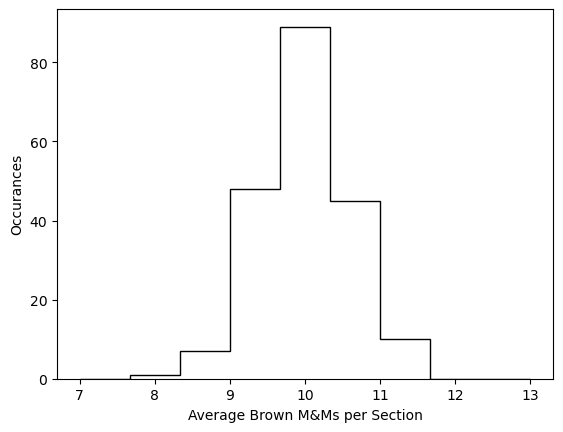

In [14]:
binned = np.linspace(7,13,10) #define the bin edges to make it look nice

plt.hist(mm_means,bins = binned,histtype = 'step', color = 'black')
plt.xlabel('Average Brown M&Ms per Section')
plt.ylabel('Occurances')

plt.show()

**Check the Central Limit Theorem** 

The standard deviation $\sigma$ of the means should be equivalend to the standard error of the mean $\alpha$ of one section:

$$
\sigma_{\rm averages} = \frac{\sigma}{\sqrt{N}} 
$$


In [15]:
print(np.std(mm_means,ddof=1), np.mean(mm_uncs))
print('The standard deviation of the means is: %.1f brown M&Ms' %(np.std(mm_means,ddof=1)))
print('The typical standard error of the mean for the sections is: %.1f brown M&Ms' %(np.mean(mm_uncs)))


0.6010061807496443 0.5831440892769958
The standard deviation of the means is: 0.6 brown M&Ms
The typical standard error of the mean for the sections is: 0.6 brown M&Ms


The equivalence is supported.

We can also check the shape of the distribution of the means by comparing the results to 
the histrogram predicted by the Central Limit Theorem with a normal distribution using the mean and standard deviation.

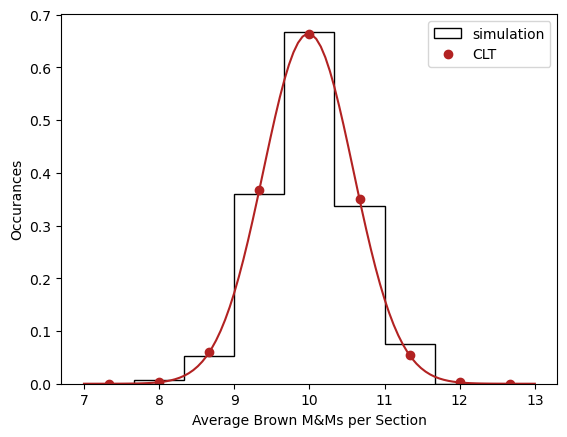

In [16]:
plt.hist(mm_means,bins = binned, density = True, histtype = 'step', color = 'black', label = 'simulation') # density = True to compare to stats.norm.pdf

xs = (binned[1:] + binned[:-1])/2 #Get x locations in the middle of the bins
plt.plot(xs, stats.norm.pdf(xs,np.mean(mm_means),np.std(mm_means, ddof = 1)),linestyle = ' ',marker = 'o', color = 'firebrick', label ='CLT') # Where the CLT shows up with the bins
plt.plot(np.linspace(7,13,100), stats.norm.pdf(np.linspace(7,13,100),np.mean(mm_means),np.std(mm_means, ddof = 1)), color = 'firebrick') # The underlying distribution

plt.xlabel('Average Brown M&Ms per Section')
plt.ylabel('Occurances')
plt.legend()
plt.show()

In [17]:
%load_ext version_information

In [18]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.12.8 64bit [Clang 14.0.6 ]
IPython 8.30.0
OS macOS 15.3 arm64 arm 64bit
numpy 2.2.2
scipy 1.15.1
matplotlib 3.10.0
Wed Feb 12 18:26:27 2025 EST